## Ансамбли и полносвязные нейронные сети
В этом ноутбуке вам нужно обучить модели на датасете классификации из предыдущего ноутбука и сравнить результаты. Вам будет предоставлен baseline, на основе которого вы будете доделывать предсказывающие модели. Оценка лабы будет зависеть от ROC-AUC на тестовых данных по следующим критериям:
\
AUC - на тестовых данных
- $AUC \leq 0.76$ - 0 баллов
- $0.76 < AUC \leq 0.77$ - 2 балла
- $0.77 < AUC \leq 0.78$ - 4 балла
- $0.78 < AUC \leq 0.79$ - 6 баллов
- $0.79 < AUC \leq 0.80$ - 8 баллов
- $AUC > 0.80$ - 10 баллов


In [1]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.utils import resample

from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, accuracy_score

from sklearn.model_selection import train_test_split
from random import randint

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('german.csv', sep=';')
print(data.head())

X = data.iloc[:, 1:]

y = data.iloc[:, 0]
y.to_numpy()
x_resampled = resample(X[y==1], n_samples=X[y==0].shape[0], random_state=1000)
X_ = np.concatenate((X[y==0], x_resampled))
y_ = np.concatenate((y[y==0], np.ones(shape=(X[y==0].shape[0],), dtype=np.int32)))

X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=42)

   Creditability  Account_Balance  Duration_of_Credit_monthly  \
0              1                1                          18   
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   

   Payment_Status_of_Previous_Credit  Purpose  Credit_Amount  \
0                                  4        2           1049   
1                                  4        0           2799   
2                                  2        9            841   
3                                  4        0           2122   
4                                  4        0           2171   

   Value_Savings_Stocks  Length_of_current_employment  Instalment_per_cent  \
0                     1                             2                    4   
1                     1                             3               

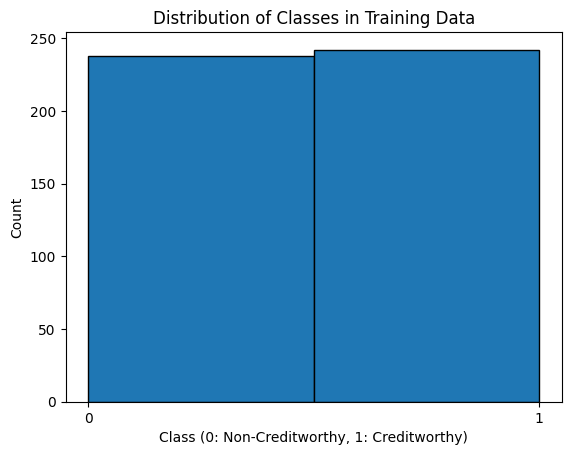

In [3]:
plt.hist(y_train, bins=2, edgecolor='k')
plt.xticks([0, 1])
plt.xlabel('Class (0: Non-Creditworthy, 1: Creditworthy)')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Data')
plt.show()

In [119]:
# Обучение Random Forest
rf_param_grid = {
    'n_estimators': [500], # 100 колличество деревьев в лесу; прямая зависимость с точностью, обратная со скоростью алгоритма
    # 'criterion': ['log_loss'], # функция для измерения качества разделения
    'max_depth': [20],
    'max_leaf_nodes':[5], # 2 максимальное количество конечных узлов, которое может иметь дерево решений
    'min_samples_split': [50], # 2 минимальное количество выборок, необходимое для разделения внутреннего узла: значение по умолчанию
    'min_samples_leaf': [70], # 1 минимальное количество выборок, необходимое для присутствия на листовом узле
    'max_features': [3] 
}
# n_estimators=100,
rf = RandomForestClassifier()#48 рандомизация загрузки выборок 
rf_model = GridSearchCV(rf, param_grid= rf_param_grid, cv=5, n_jobs = 1) #n_jobs сообщает механизму, сколько процессоров он может использовать
rf_model.fit(X_train, y_train)
# print(rf_model.best_params_)
# Прогноз на тестовых данных
rf_pred = rf_model.predict(X_test)
print(rf_model.best_params_)
# Расчет метрик для Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print("Random Forest метрики:")
print(f"ROC AUC: {rf_roc_auc:.2f}")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")

{'max_depth': 20, 'max_features': 3, 'max_leaf_nodes': 5, 'min_samples_leaf': 70, 'min_samples_split': 50, 'n_estimators': 500}
Random Forest метрики:
ROC AUC: 0.77
Accuracy: 0.77
Precision: 0.77
Recall: 0.74


In [58]:
# Обучение Gradient Boosting
gb_param_grid = {
    'n_estimators': [500],
    'learning_rate': [0.9],
    'max_depth': [40],
    'criterion':['friedman_mse'],
    'min_samples_split': [70],
    'loss' : ['log_loss'],
    'min_samples_leaf': [70]
}
gb = GradientBoostingClassifier( random_state=44)
gb_model = GridSearchCV(gb, gb_param_grid, cv=10, n_jobs = 1)
gb_model.fit(X_train, y_train)

# Прогноз на тестовых данных
gb_pred = gb_model.predict(X_test)

# Расчет метрик для Gradient Boosting
gb_roc_auc = roc_auc_score(y_test, gb_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)

print("\nGradient Boosting метрики:")
print(gb_model.best_params_)
print(f"ROC AUC: {gb_roc_auc:.2f}")
print(f"Accuracy: {gb_accuracy:.2f}")
print(f"Precision: {gb_precision:.2f}")
print(f"Recall: {gb_recall:.2f}")


Gradient Boosting метрики:
{'criterion': 'friedman_mse', 'learning_rate': 0.9, 'loss': 'log_loss', 'max_depth': 40, 'min_samples_leaf': 70, 'min_samples_split': 70, 'n_estimators': 500}
ROC AUC: 0.78
Accuracy: 0.78
Precision: 0.75
Recall: 0.79


In [160]:
# Обучение MLP (Multi-Layer Perceptron) нейронной сети
param_grid = {
    #'hidden_layer_sizes': [(300,)], , (50,100,50), (100,)
    'activation': ['logistic'], #(50,),,'relu' ,,'tanh'
    'alpha': [0.0001],
    'solver':['adam'],#,'sgd'
    'learning_rate': ['adaptive'], #, 'constant','invscaling' 
    'learning_rate_init':[0.00015],
    'beta_1': [0.8]
}
# hidden_layer_sizes=(30,),
mlp = MLPClassifier(max_iter=3000, random_state=42)
mlp_model = GridSearchCV(mlp, param_grid, cv=5)
mlp_model.fit(X_train, y_train)
print(mlp_model.best_params_)
# Прогноз на тестовых данных
mlp_pred = mlp_model.predict(X_test)

# Расчет метрик для MLP нейронной сети
mlp_roc_auc = roc_auc_score(y_test, mlp_pred)
mlp_accuracy = accuracy_score(y_test, mlp_pred)
mlp_precision = precision_score(y_test, mlp_pred)
mlp_recall = recall_score(y_test, mlp_pred)

print("\nMLP (Neural Network) метрики:")
print(f"ROC AUC: {mlp_roc_auc:.2f}")
print(f"Accuracy: {mlp_accuracy:.2f}")
print(f"Precision: {mlp_precision:.2f}")
print(f"Recall: {mlp_recall:.2f}")

{'activation': 'logistic', 'alpha': 0.0001, 'beta_1': 0.8, 'learning_rate': 'adaptive', 'learning_rate_init': 0.00015, 'solver': 'adam'}

MLP (Neural Network) метрики:
ROC AUC: 0.72
Accuracy: 0.72
Precision: 0.69
Recall: 0.74


## Экспериментируйте
Для получения лучшего качества придется поэкспериментировать. Подсказка: попробуйте оптимизировать гиперпараметры модели

In [46]:
data_minor = data.loc[data['Creditability'] == 0]
data_augmented = data_minor.loc[data_minor.index.repeat(3)]
data_balanced = pd.concat([data.loc[data['Creditability'] == 1], data_augmented]).sample(frac=1)

X = data_balanced.iloc[:, 1:]
y = data_balanced.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42, )

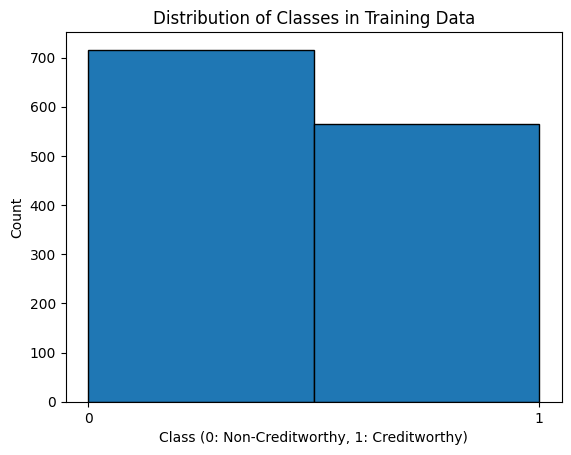

In [47]:
plt.hist(y_train, bins=2, edgecolor='k')
plt.xticks([0, 1])
plt.xlabel('Class (0: Non-Creditworthy, 1: Creditworthy)')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Data')
plt.show()

In [49]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
rf_roc_auc = roc_auc_score(y_test, rf_pred)
mlp_accuracy = accuracy_score(y_test, rf_pred)
mlp_precision = precision_score(y_test, rf_pred)
mlp_recall = recall_score(y_test, rf_pred)
print("Random Forest метрики:")
print(f"ROC AUC: {rf_roc_auc:.2f}")
print(f"Accuracy: {mlp_accuracy:.2f}")
print(f"Precision: {mlp_precision:.2f}")
print(f"Recall: {mlp_recall:.2f}")

Random Forest метрики:
ROC AUC: 0.91
Accuracy: 0.93
Precision: 0.97
Recall: 0.85
